In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

original_data = pd.read_csv("us-states.csv")

# simplify dataset
data = original_data.drop(['fips','deaths'], axis=1)
df.head(1000)

,date,state,cases
0,2020-01-21,Washington,1
1,2020-01-22,Washington,1
2,2020-01-23,Washington,1
3,2020-01-24,Illinois,1
4,2020-01-24,Washington,1
...,...,...,...
995,2020-03-20,Oregon,114
996,2020-03-20,Pennsylvania,269
997,2020-03-20,Puerto Rico,14
998,2020-03-20,Rhode Island,44


C:\Users\weipa\AppData\Local\Temp\ipykernel_4100\1762435334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new=state_case.loc[:,'new cases']=new_case
C:\Users\weipa\AppData\Local\Temp\ipykernel_4100\1762435334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new=state_case.loc[:,'new cases']=new_case
C:\Users\weipa\AppData\Local\Temp\ipykernel_4100\1762435334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

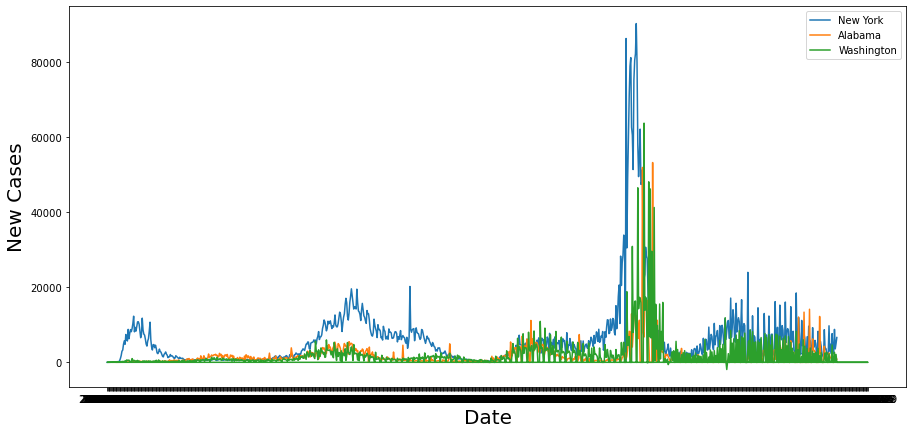

In [231]:
def plot_state_cases(state):
    for i in range(len(state)):
        case=data[data.state==state[i]].cases
        # new cases
        new_case=[case.iloc[i+1]-case.iloc[i] for i in range(case.shape[0]-1)]
        new_case=np.insert(new_case,0,case.iloc[0])
        state_case=data[data.state==state[i]]
        new=state_case.loc[:,'new cases']=new_case
        state_case = state_case.reset_index(drop=True)
        # plot
        plt.plot(state_case['date'], state_case['new cases'], label = state[i])
        plt.legend()
        plt.xlabel('Date',fontsize=20)
        plt.ylabel('New Cases',fontsize=20)
    
plot_state_cases(['New York','Alabama','Washington'])


In [230]:
def peak(state):
    case=data[data.state==state].cases
    # new cases
    new_case=[case.iloc[i+1]-case.iloc[i] for i in range(case.shape[0]-1)]
    new_case=np.insert(new_case,0,case.iloc[0])
    state_case=data[data.state==state]
    new=state_case.loc[:,'new cases']=new_case
    # find peak number
    new_case_number=state_case['new cases']
    peak_number=new_case_number.max()
    # find date associated with peak number
    date = state_case[state_case['new cases'] == peak_number]['date']
    return date.iloc[0]
   
print(peak('Connecticut'))
print(peak('Washington'))
print(peak('New York'))
print(peak('New Jersey'))
print(peak('Illinois'))

2022-01-10
2022-01-18
2022-01-08
2021-01-04
2022-01-18


C:\Users\weipa\AppData\Local\Temp\ipykernel_4100\3764971302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new=state_case.loc[:,'new cases']=new_case
C:\Users\weipa\AppData\Local\Temp\ipykernel_4100\3764971302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new=state_case.loc[:,'new cases']=new_case
C:\Users\weipa\AppData\Local\Temp\ipykernel_4100\3764971302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [237]:
from dateutil.parser import parse as parse
def state_comp(state1, state2):
    # find peak date
    peak1 = peak(state1)
    peak2 = peak(state2)
    
    date1 = parse(peak1)
    date2 = parse(peak2)
    
    if (date1 == date2):
        print(state1, 'and', state2, 'had same peak on',peak1)
    elif (date1 < date2):
        print(state1, "had its peak", (date2-date1).days, "days earlier than", state2)
    else:
        print(state2, "had its peak", (date1-date2).days, "days earlier than", state1)


state_comp('Washington', 'New York')
state_comp('Connecticut', 'Ohio')

New York had its peak 10 days earlier than Washington
Connecticut had its peak 5 days earlier than Ohio


C:\Users\weipa\AppData\Local\Temp\ipykernel_4100\3764971302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new=state_case.loc[:,'new cases']=new_case
C:\Users\weipa\AppData\Local\Temp\ipykernel_4100\3764971302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new=state_case.loc[:,'new cases']=new_case
C:\Users\weipa\AppData\Local\Temp\ipykernel_4100\3764971302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va